# Practice Exercise – Model Training and Evaluation

# Problem 1: Spam email classification

In this example, you will work on classifying emails as spam or not spam.

You will use the [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase) from the University of California, Irvine (UCI) Machine Learning Repository.

__Source information:__

Creators:
Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt, Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

Donor:
George Forman gforman@hpl.hp.com 650-857-7835

----------------------------------------------------------------------------

The data has 57 attributes and 1 target. They are described below.
- 48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
i.e. 100 * (number of times the WORD appears in the e-mail) / 
total number of words in e-mail.  A "word" in this case is any 
string of alphanumeric characters bounded by non-alphanumeric 
characters or end-of-string.

- 6 continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
i.e. 100 * (number of CHAR occurrences) / total characters in e-mail

- 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

- 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  

## 1. Getting the data

In [1]:
import subprocess
import os

# Check whether the file is already in the desired path or if it needs to be downloaded
# File downloaded from source : https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

base_path = '/home/ec2-user/SageMaker/data/'
file_path = 'spambase.data'

if not os.path.isfile(base_path + file_path):
    subprocess.run(['mkdir', '-p', base_path])
    subprocess.run(['aws', 's3', 'cp', 
                    's3://aws-tc-largeobjects/ILT-TF-200-MLDWTS/lab3/', 
                    base_path,'--recursive'])
else:
    print('File already downloaded!')

In [2]:
import csv
import numpy as np

data = []

f = open('/home/ec2-user/SageMaker/data/spambase.data')
reader = csv.reader(f)
next(reader, None)
for row in reader:
    data.append(row)
f.close()

Write the data into a DataFrame for easier visualization and analysis. Also, add the attribute names, which are from the "spambase.names" file in the dataset package.

In [3]:
import pandas as pd

df = pd.DataFrame(data=np.array(data).astype(np.float), columns=["word_freq_make",
            "word_freq_address",
            "word_freq_all",
            "word_freq_3d",
            "word_freq_our",
            "word_freq_over",
            "word_freq_remove",
            "word_freq_internet",
            "word_freq_order",
            "word_freq_mail",
            "word_freq_receive",
            "word_freq_will",
            "word_freq_people",
            "word_freq_report",
            "word_freq_addresses",
            "word_freq_free",
            "word_freq_business",
            "word_freq_email",
            "word_freq_you",
            "word_freq_credit",
            "word_freq_your",
            "word_freq_font",
            "word_freq_000",
            "word_freq_money",
            "word_freq_hp",
            "word_freq_hpl",
            "word_freq_george",
            "word_freq_650",
            "word_freq_lab",
            "word_freq_labs",
            "word_freq_telnet",
            "word_freq_857",
            "word_freq_data",
            "word_freq_415",
            "word_freq_85",
            "word_freq_technology",
            "word_freq_1999",
            "word_freq_parts",
            "word_freq_pm",
            "word_freq_direct",
            "word_freq_cs",
            "word_freq_meeting",
            "word_freq_original",
            "word_freq_project",
            "word_freq_re",
            "word_freq_edu",
            "word_freq_table",
            "word_freq_conference",
            "char_freq_;",
            "char_freq_(",
            "char_freq_[",
            "char_freq_!",
            "char_freq_$",
            "char_freq_#",
            "capital_run_length_average",
            "capital_run_length_longest",
            "capital_run_length_total",
            "target"]
            )

Look at the shape of the data. There are 58 columns (including the target) as expected.

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


The `df.describe()` function presents a statistical summary of the features.

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 2. Training the model

In this section, you will do the following:

- Split the dataset into training, validation, and test subsets
- Use the Amazon SageMaker linear learner algorithm to train the model

> ### Question 1 - Train-test-validation split
>
> An important part of training a machine learning model is splitting the data into training, validation, and test subsets. You will use the `train_test_split()` function from the `sklearn` library ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

>Look at this example:
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> This function splits input feature `X` and target `y` pairs by a given ratio (test_size). This specific example splits the data into training (80%) and test (20%) subsets.
>
> Use this function __twice__ to split the data into __training (80%)__, __validation (10%)__, and __test (10%)__ subsets.

In [6]:
from sklearn.model_selection import train_test_split

# Get the feature values until the target column (not included)
X = df.values[:, :-1].astype(np.float32)

# Get the target column
y = df.values[:, -1].astype(np.float32)

# Get 80% of the data for training; the remaining 20% will be for validation and test
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# Split the remaining 20% of data as 10% test and 10% validation
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (3680, 57)
Length of train_labels is: (3680,)
Length of val_features is: (460, 57)
Length of val_labels is: (460,)
Length of test_features is: (460, 57)
Length of test_labels is: (460,)


Now, call the Amazon SageMaker `LinearLearner()` algorithm. This example uses an `ml.m4.xlarge` instance for training. `predictor_type` is set to __'binary_classifier'__ because there are two classes: "spam" and "not spam".

In [7]:
import sagemaker

# Call the LinearLearner estimator object
binary_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='binary_classifier')

Use the `record_set()` function of the binary_estimator to set the training, validation, and test parts of the estimator. 

In [8]:
train_records = binary_estimator.record_set(train_features, train_labels, channel='train')
val_records = binary_estimator.record_set(val_features, val_labels, channel='validation')
test_records = binary_estimator.record_set(test_features, test_labels, channel='test')

The `fit()` function applies a distributed version of the Stochastic Gradient Descent (SGD) algorithm, and we are sending the data to it.

In [9]:
binary_estimator.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-03-10 12:20:15 Starting - Starting the training job...
2021-03-10 12:20:40 Starting - Launching requested ML instancesProfilerReport-1615378814: InProgress
.........
2021-03-10 12:22:01 Starting - Preparing the instances for training......
2021-03-10 12:23:10 Downloading - Downloading input data...
2021-03-10 12:23:42 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/10/2021 12:24:01 INFO 139735875639104] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': 

## 3. Evaluating the model

In this section, you will look at how the model performs with the test dataset. 

### Amazon SageMaker analytics
You can use `sagemaker.analytics` to get some performance metrics. This doesn't require deploying the model. Because this is a classification problem, you can check accuracy, precision, and recall.

In [10]:
sagemaker.analytics.TrainingJobAnalytics(binary_estimator._current_job_name, 
                                         metric_names = ['test:binary_classification_accuracy', 
                                                         'test:precision', 
                                                         'test:recall']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:binary_classification_accuracy,0.930435
1,0.0,test:precision,0.906977
2,0.0,test:recall,0.906977


### Deploying the model
To deploy the model, run the following cell.

**Note:** This takes some time to complete. While you are waiting, think about the answer to question 2.

In [11]:
binary_predictor = binary_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

> ### Question 2 - Evaluation metric selection
> You need to consider the business and its related restrictions when selecting the evaluation metric. In this case, spam detection requires being careful about false positives. A false positive means a good email is classified as a spam email. Because spam emails usually go to a spam folder, a user could lose important information from a false positive.

>Some well-known evaluation metrics include the following:
- Accuracy = ( TP + TN ) / ( TP + FP + FN + TN )
- Precision = ( TP ) / ( TP + FP )
- Recall = ( TP ) / ( TP + FN )
>
>In light of the provided information, which of the provided metrics do you think is the best to consider?

**Answer:** Precision is the choice of metric here as it accounts for the false positives. High precision means high TP and low FP.

Now that you have a hosted endpoint running, you can make real-time predictions from the model easily, simply by making an http POST request. First, you need to set up serializers and deserializers for passing the `test_features` NumPy arrays to the model behind the endpoint. You will also calculate the confusion matrix for the model to evaluate how it has done on the test data.

> ### Question 3 - Calculate metrics
>
> In this question, you are asked to calculate some important evaluation metrics. The accuracy calculation is used as an example. Calculate the precision and recall after accuracy.
>
>**Hint:** You can check your calculated values with the `sagemaker.analytics` results you got in the beginning of this section.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for each batch with size of 25
def predict_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    # Parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))

    # Calculate accuracy, precision, and recall
    accuracy = (preds == labels).sum() / len(labels)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = (preds[preds == 1] == labels[preds == 1]).sum() / len(preds[preds == 1])
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = (preds[preds == 1] == labels[preds == 1]).sum() / len(labels[labels == 1])
    print(f'Recall: {recall}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=np.round(preds), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 

Get training performance

Accuracy: 0.9301630434782608
Precision: 0.9192200557103064
Recall: 0.9034907597535934


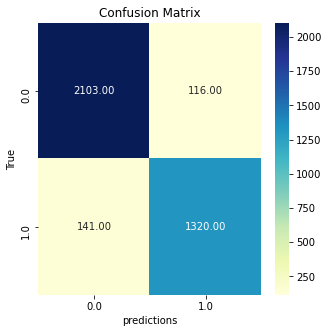

In [13]:
predict_batches(binary_predictor, train_features, train_labels)

Get test performance

Accuracy: 0.9304347826086956
Precision: 0.9069767441860465
Recall: 0.9069767441860465


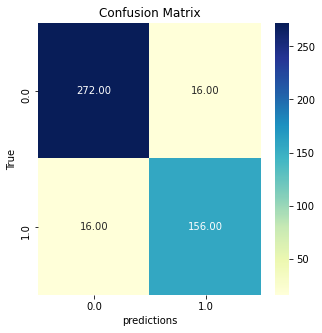

In [14]:
predict_batches(binary_predictor, test_features, test_labels)

> ### Question 4 - Compare training-test results
> Do you see a big difference between training and test performance?

**Answer**: The two performances look very similar. We didn't experience overfitting here.

## 4. Conclusion
In this exercise, you developed a binary classifier using the linear learning algorithm in Amazon SageMaker. You also reviewed important concepts such as training, validation, and test splits; confusion matrices; and classification metrics. Overall, the model resulted in over 90% in the accuracy, precision, and recall metrics.

----------------------------------------------------------------------------
# Problem 2: Diabetes progression prediction (regression)

For regression, you will work with a health-related dataset to predict diabetes.

You will use the [Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The __Scikit-learn__ library hosts this data as well. You will use this library to load the dataset. 

Fields in this dataset:  

Input:  
1 - age  
2 - sex  
3 - bmi (Body mass index)  
4 - bp (Blood pressure)  
5 - s1 (Serum measurement 1)  
6 - s2 (Serum measurement 2)  
7 - s3 (Serum measurement 3)   
8 - s4 (Serum measurement 4)  
9 - s5 (Serum measurement 5)  
10 - s6 (Serum measurement 6)

Output:  
11 - y (A quantitative measure of disease progression one year after baseline)  

## 1. Getting the data

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data.astype(np.float32), diabetes.target.astype(np.float32)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (442, 10)
Y shape: (442,)


In [16]:
import pandas as pd

df = pd.DataFrame(data=np.column_stack((X, y)), 
                  columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y']
                 )

**Note:** The features are normalized and scaled beforehand. 

In [17]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


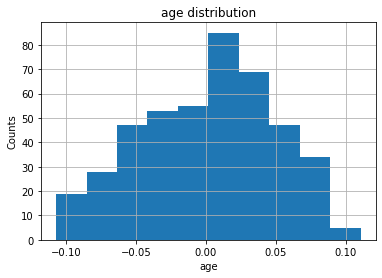

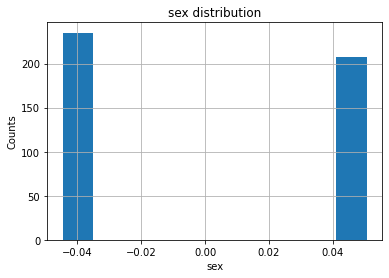

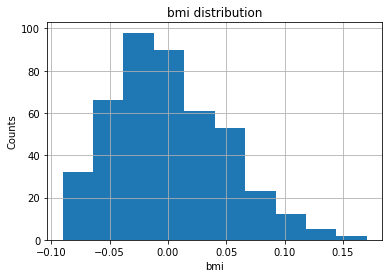

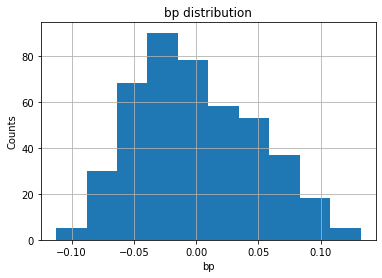

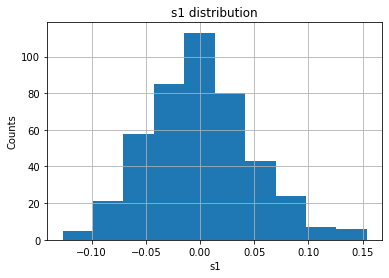

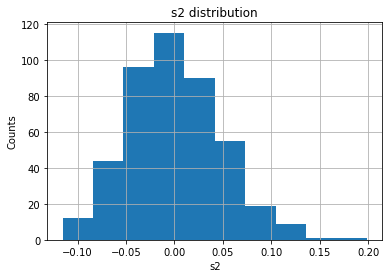

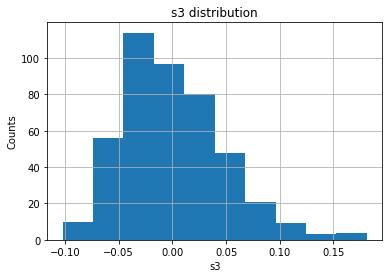

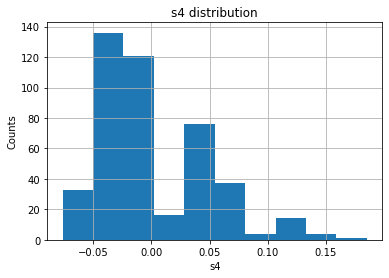

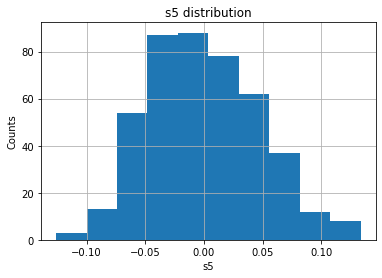

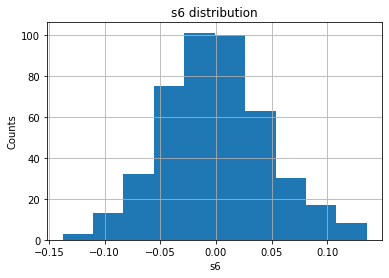

In [18]:
import matplotlib.pyplot as plt
#%matplotlib inline
for col in ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']:
    plt.hist(df[col].values)
    plt.title(col + ' distribution')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

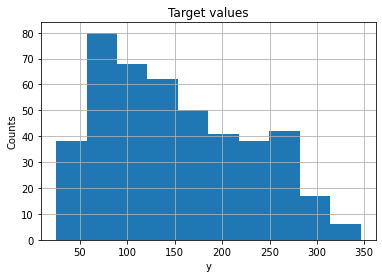

In [19]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.hist(y)
plt.title('Target values')
plt.xlabel('y')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

## 2. Training the model

In this section, you will do the following:

- Split the dataset into training, validation, and test subsets
- Use the Amazon SageMaker linear learner algorithm to train the model

> ### Question 1 - Train-test-validation split
>
> An important part of training a machine learning model is splitting the data into training, validation, and test subsets. You will use the `train_test_split()` function from the `sklearn` library [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

>Look at this example:
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> This function splits input feature `X` and target `y` pairs by a given ratio (test_size). This specific example splits the data into training (80%) and test (20%) subsets.
>
> Use this function __twice__ to split the data into __training (80%)__, __validation (10%)__, and __test (10%)__ subsets.

In [20]:
from sklearn.model_selection import train_test_split

# Get 80% of the data for training; the remaining 20% will be for validation and test
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# Split the remaining 20% of data as 10% test and 10% validation
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (353, 10)
Length of train_labels is: (353,)
Length of val_features is: (45, 10)
Length of val_labels is: (45,)
Length of test_features is: (44, 10)
Length of test_labels is: (44,)


Now, call the Amazon SageMaker `LinearLearner()` algorithm. This example uses an `ml.m4.xlarge` instance for training. `predictor_type` is set to __'regressor'__ because this is a regression problem.

In [21]:
import sagemaker

# Call the LinearLearner estimator object
regression_model = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='regressor')

Use the `record_set()` function of the binary_estimator to set the training, validation, and test parts of the estimator. 

In [22]:
train_records = regression_model.record_set(train_features, train_labels, channel='train')
val_records = regression_model.record_set(val_features, val_labels, channel='validation')
test_records = regression_model.record_set(test_features, test_labels, channel='test')

The `fit()` function applies regression on this data.

In [23]:
regression_model.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-03-10 12:41:14 Starting - Starting the training job...
2021-03-10 12:41:37 Starting - Launching requested ML instancesProfilerReport-1615380074: InProgress
......
2021-03-10 12:42:38 Starting - Preparing the instances for training.........
2021-03-10 12:44:15 Downloading - Downloading input data...
2021-03-10 12:44:39 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/10/2021 12:44:56 INFO 139671226517312] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': 

## 3. Evaluating the model

In this section, you will look at how your model performs with the test dataset. 

### Amazon SageMaker analytics
You can use `sagemaker.analytics` to get some performance metrics. This doesn't require deploying the model. Because this is a regression problem, you can check the **mean squared error**.

In [24]:
sagemaker.analytics.TrainingJobAnalytics(regression_model._current_job_name, 
                                         metric_names = ['test:mse']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:mse,3348.424361


### Deploying the model
To deploy the model, run the following cell.

**Note:** This takes some time to complete. While you are waiting, think about the answer to question 2.

In [25]:
regression_predictor = regression_model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

>### Question 2 - Calculate mean squared error
>
>In this question, you will calculate the mean squared error. It is given by this equation:
>
>mean squared error = $\displaystyle\frac{1}{n}\sum_{t=1}^{n}(pred_t-target_t)^2$
>
>Calculate the mean squared error using the __preds__ and __labels__ variables and print it.

In [26]:
import matplotlib.pyplot as plt

# Get predictions for each batch with size of 25
def predict_regression_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    
    # Parse protobuf responses to extract predicted labels
    extract_score = lambda x: x.label['score'].float32_tensor.values
    preds = np.concatenate([np.array([extract_score(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))
    
    # Calculate mean squared error
    mse = sum((preds - labels)**2) / len(preds)
    print(mse)
    
    return preds

Now, get the results on the training and test subsets.

In [27]:
train_predictions = predict_regression_batches(regression_predictor, train_features, train_labels)

3145.8138859366118


In [28]:
test_predictions = predict_regression_batches(regression_predictor, test_features, test_labels)

3348.424252298438


### Plotting results

Let's look at some plots. Even though you calculated the mean squared error, it is still a good idea to examine the results visually.

### Scatter plot

With the scatter plot, you look at the fitted (predicted) values vs. true values. From the following plot, you can see that the predicted and true values followed a similar pattern overall.

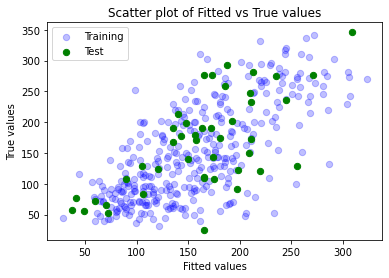

In [29]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_labels, c='g', s=40, label='Test')
plt.title("Scatter plot of Fitted vs True values")
plt.ylabel("True values")
plt.xlabel("Fitted values")
plt.legend(loc='best')
plt.show()

### Residual plot

Every data point has a residual. It is the difference between the real value and the predicted value. Residuals are calculated like this:  
$e = y - \hat y$  

A positive residual means a higher prediction than true value, and a negative residual means a lower prediction than true value.    

Take a look at the residual plot from running the following block. There is a random pattern in residuals, which is good. Other patterns you might see are the U-shape or inverted U-shape patterns. These two patterns point out some non-linearity in the data, which needs to be fixed. In this case case, we don't have that problem. 

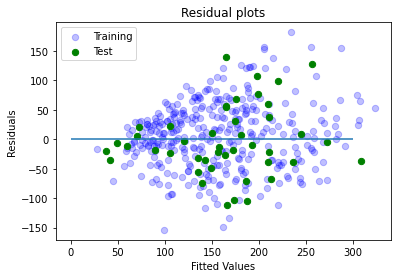

In [30]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_predictions-train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_predictions-test_labels, c='g', s=40, label='Test')
plt.hlines(y=0, xmin=0, xmax=300)
plt.title("Residual plots")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.legend(loc='best')
plt.show()

>### Question 3: Residual plot assessment
>
>In general, looking at a residual plot allows you to realize a pattern. Patterns include:
>- Random: This means the data is linear.
>- U or inverse U shape: This points out some non-linearity in the data.
>
>What can you conclude from the residual plot?

**Answer**: The plot shows random residuals, meaning the data is linear.

## 4. Conclusion
In this exercise, you developed a regression model using the linear learning algorithm in Amazon SageMaker. You also covered important concepts, such as training, validation, and test splits; the mean squared error regression metric; and analysis of residual error.